## Dice Loss Function Demo

This is to demonstrate how to use the dice loss function and to show how it is comparing the truth vs our prediction.

In [1]:
import tensorflow as tf
import utils.dice as dice
import utils.hgg_utils as hu
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'utils'

So to start, we can do the basics and get a scan.

In [4]:
patient = hu.get_each_hgg_folder()[0]
mask = hu.get_a_mask_tensor(patient)

So this is the actual mask provided:

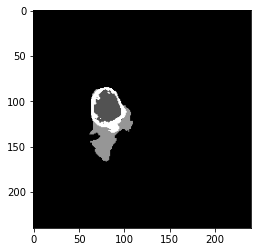

In [6]:
plt.imshow(mask[:,:,70,0].T, cmap="Greys_r")

However, we will be using a binary version of this mask:

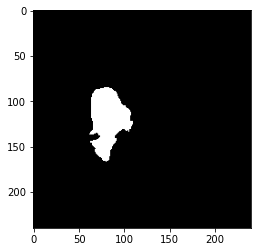

In [7]:
bin_mask = hu.convert_mask_to_binary_mask( mask )
plt.imshow(bin_mask[:,:,70,0].T, cmap="Greys_r")

So the first test we are going to do is just to compare this image of the ground truth mask to a copy of the same mask. This shows the scenario of our model predicting the mask perfectly. We don't have any actual predictions at this point since the model is not built, so I will just be editing the mask to show different levels of accuracy.

In [9]:
# This will be our true mask, this will not change
truth = np.copy(bin_mask[:,:,70,0].T)

Now we have a prediction.  
For this scenario it is perfect, as it is just a copy.

In [10]:
prediction = np.copy(truth)

Just to show they are the same:

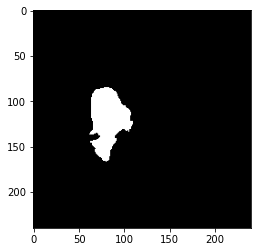

In [14]:
plt.imshow(truth, cmap='Greys_r')

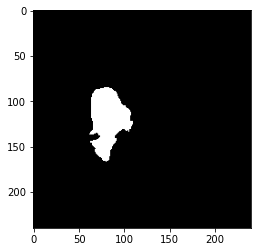

In [15]:
plt.imshow(prediction, cmap='Greys_r')

We should have a loss of zero, since it is an exact match

In [17]:
print(dice.dice_loss(truth, prediction))

0.0


Next scenario:   
The model is completely wrong.   
We should have at nearly 1

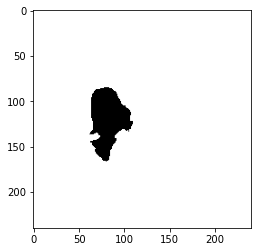

In [18]:
# switch the zeroes and ones
switched_prediction = 1 - np.copy(prediction)
plt.imshow(switched_prediction, cmap='Greys_r')

In [70]:
print(dice.dice_loss(truth, switched_prediction))

0.9999913195197958


So this is just a kind of useless function, it's not pretty because I did it quickly, but what it does is it allows you to define how much of the prediction you want to be correct, and creates a new image with that specification.  
Really, this is just for testing purposes. 

In [78]:
def change_percentage_correct(truth, percentage=1):
    percentage = 1 - percentage
    new_prediction = np.copy(truth)
    total_pixels = truth.shape[0] * truth.shape[1]
    for i in range(0, int(new_prediction.shape[0])):
        for j in range(0, int(new_prediction.shape[0] * percentage)):
            if new_prediction[i,j] == 0:
                new_prediction[i,j] =1
            else:
                new_prediction[i,j] = 0
    return new_prediction
            

In [72]:
_50_percent_correct_prediction = np.copy(change_percentage_correct(truth, .50))

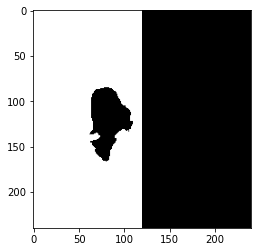

In [73]:
plt.imshow(_50_percent_correct_prediction, cmap='Greys_r')

Since this should be 50% correct, we should get a loss of 0.5

In [74]:
print(dice.dice_loss(truth, some_percentage))

0.4999956597598979


Last demonstration. We will make it 30% correct, so we should get about 0.7 in loss. Note that because the change_percentage_correct function truncates the percentages to integers for indexing, it will not be exactly 30% but it will be close enough for demonstration.

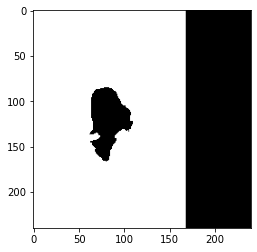

In [81]:
_30_percent_correct_prediction = np.copy(change_percentage_correct(truth, 0.3))
plt.imshow(_30_percent_correct_prediction, cmap='Greys_r')

In [82]:
print(dice.dice_loss(truth, _30_percent_correct_prediction))

0.699993923663857
